In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.animation as animation

import astropy.units as u
import astropy.constants as const
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, SkyOffsetFrame


from scipy.sparse.linalg import eigsh
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize
from scipy.sparse.linalg import svds
from scipy.interpolate import griddata


import time as timer

import sys
sys.path.append('..')  # Add parent directory to the system path

from pint.models import get_model
from RickettTables import fitvals
from RickettEquations import *
from Curvature import *

import scintools2.scintools.ththmod as thth
from scintools2.scintools.dynspec import BasicDyn, Dynspec



import gc
from multiprocessing import Pool
from tqdm.notebook import tqdm

import warnings

warnings.filterwarnings("ignore", message="divide by zero encountered in divide")
biharmonic = False

import os
from datetime import datetime

In [2]:
from Funcs_DP import *
from Funcs_DP_Orbsim import *
from Funcs_DP_Sspec import *

In [3]:
full_sorted = meerkat_data_extractor( '/fs/lustre/scratch/montalvo/meerkat/Obs' )

In [4]:
#folder index (from 1 -4)
band_index = 3

key_list = list(full_sorted[band_index-1].keys())
list(full_sorted[band_index-1].keys())

['2022-9-18', '2023-4-23', '2023-7-13', '2024-3-2']

In [5]:
#observation index (will vary depending on the folder)
key_index = 2
key_list[key_index]

'2023-7-13'

In [6]:
#joining the different observations within a day and returning a new time, frequency and dynamic spec
ts, ds, fs, mjds = meerk_dyn_sticher(full_sorted, band_index, key_list[key_index])

Now adding J0737-3039A_2023-07-13-11:33:59_zap.ar.dynspec ...
Now adding J0737-3039A_2023-07-13-13:34:09_zap.ar.dynspec ...


In [8]:
#shape of dynamic spec
ds.shape

(16384, 1351)

the first entry outlines the number of frequency channels, and it will be used to crop the dynamic spectrum

Text(0, 0.5, 'Frequency (MHz)')

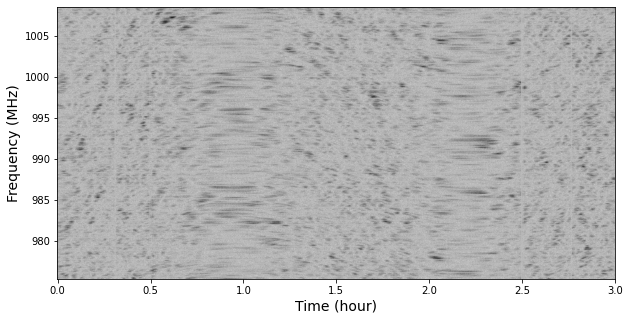

In [9]:
#choose only certain frequency channels from ki to kf
ki = 13000
kf = 14000

plt.figure(figsize = (10,5))
plt.imshow(ds[ki:kf],
           origin='lower',
           aspect = 'auto',
           interpolation = None,
           cmap = 'gray_r',
           vmin = np.min(ds[ki:kf]),
           vmax = np.max(ds[ki:kf]),
           extent=ext_find(ts.to(u.hour), fs[ki:kf]), )
plt.xlabel("Time (hour)", fontsize = 14)
plt.ylabel("Frequency (MHz)", fontsize = 14)

